In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\HEMANTH\\Desktop\\dataset\\Company Attrition Data.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured', 'salary'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sales_Occured"]=le.fit_transform(data["Sales_Occured"])
data["salary"]=le.fit_transform(data["salary"])

<AxesSubplot:>

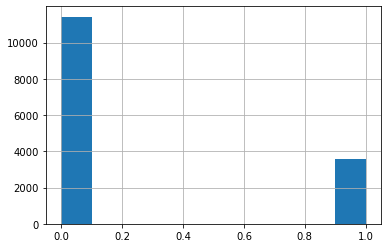

In [6]:
import matplotlib as plt
data['left'].hist()

<AxesSubplot:>

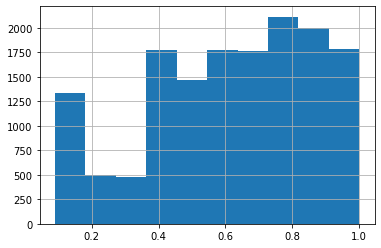

In [18]:
data['satisfaction_level'].hist()

<AxesSubplot:>

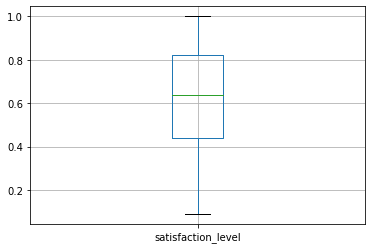

In [19]:
data.boxplot(column='satisfaction_level')

<AxesSubplot:title={'center':'left'}, xlabel='satisfaction_level'>

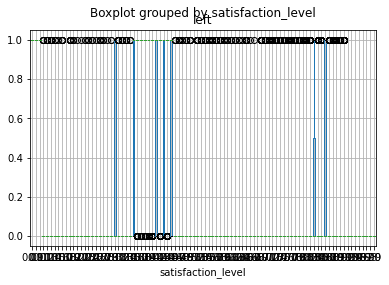

In [8]:
data.boxplot(column='left',by='satisfaction_level')

In [9]:
X=data.loc[:,['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']]

In [10]:
X

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,2,157,3,0,0,1
1,0.80,5,262,6,0,0,2
2,0.11,7,272,4,0,0,2
3,0.72,5,223,5,0,0,1
4,0.37,2,159,3,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,1
14995,0.37,2,160,3,0,0,1
14996,0.37,2,143,3,0,0,1
14997,0.11,6,280,4,0,0,1


In [11]:
y=data["left"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
accuracy_score(y_test,pred)

0.9453333333333334

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2294
           1       0.88      0.90      0.89       706

    accuracy                           0.95      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.95      0.95      0.95      3000



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[2204,   90],
       [  74,  632]], dtype=int64)